# PREDICTOR

# Getting The Data

### Setup IG Session

In [1]:
pip install trading_ig pandas munch tenacity

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys

sys.path.append("./utils/")

In [3]:
from utils.IG import IG

_IG = IG()
config = _IG.getLoginConfig('live')

IG - Instantiated


In [4]:
ig_service = _IG.getIgService(config)
_IG.getIgAccountDetails(ig_service)

{'accountType': 'CFD',
 'accountInfo': {'balance': 237.01,
  'deposit': 52.73,
  'profitLoss': -55.1,
  'available': 129.18},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Data of GBP/USD Mini

In [5]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
PREVIOUS_DAY_COUNT_FROM_TODAY = 2

In [6]:
# Get today's next day date as End Date, and previous X month(s) from today as Start Date

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

end_date = datetime.combine(date.today(), datetime.max.time())
start_date = datetime.combine(date.today() - relativedelta(days=PREVIOUS_DAY_COUNT_FROM_TODAY), datetime.min.time())

print(f'''End: {end_date}''')
print(f'''Start: {start_date}''')

End: 2022-05-07 23:59:59.999999
Start: 2022-05-05 00:00:00


In [7]:
try:
    history = ig_service.fetch_historical_prices_by_epic_and_date_range(TARGET_EPIC, RESOLUTION, start_date, end_date)
    history['prices']
except Exception as e:
    print(e)
    sys.exit(1)

In [8]:
import pandas as pd

df_history = pd.DataFrame.from_dict(history['prices'])
df_history = df_history.reset_index()
df_history

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
3   2022-05-05 00:45:00  1.24840  1.24941  1.24808  1.24936  1.24849  1.24950   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
..                  ...      ...      ...      ...      ...      ...      ...   
207 2022-05-07 03:45:00  1.23456  1.23489  1.23395  1.23419  1.23471  1.23504   
208 2022-05-07 04:00:00  1.23420  1.23420  1.23360  1.23377  1.23435  1.23435   
209 2022-05-07 04:15:00  1.23376  1.23386  1.23339  1.23341  1.23391  1.23401   
210 2022-05-07 04:30:00  1.23340  1.23367  1.23319  1.23328  1.23355  1.23382   
211 2022-05-07 04:45:00  1.23320  1.23460  1.23304  1.23330  1.23335  1.23570   

                      last                        
         Low    Close Open High Low Close Volume  
0    1.24811  1.24870  NaN  NaN NaN   NaN   1763  
1    1.24796  1.24910  NaN  NaN NaN   NaN   1981  
2    1.24833  1.24848  NaN  NaN NaN   NaN   1666  
3    1.24817  1.24945  NaN  NaN NaN   NaN   1542  
4    1.24916  1.24938  NaN  NaN NaN   NaN   1596  
..       ...      ...  ...  ...  ..   ...    ...  
207  1.23410  1.23434  NaN  NaN NaN   NaN   2260  
208  1.23375  1.23392  NaN  NaN NaN   NaN    748  
209  1.23354  1.23356  NaN  NaN NaN   NaN    603  
210  1.23334  1.23343  NaN  NaN NaN   NaN    529  
211  1.23319  1.23440  NaN  NaN NaN   NaN   1736  

[212 rows x 14 columns]

# Data Transformation

### Refer to the Notebook (Data_Transformer.ipynb) for the detailed process

In [9]:
param = df_history
mode = "predictor"
%run ./utils/Data_Transformer.ipynb

Note: you may need to restart the kernel to use updated packages.


In [10]:
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
1,0.141943,0.125235,0.138583,0.144521,0.257448,0.064976,0.072097,0.002423,0.122995,0.090171,0.042082,1.0
2,0.144394,0.126347,0.141179,0.140298,0.216469,0.033281,0.070225,0.065428,0.016043,0.072299,0.066445,0.0
3,0.140376,0.127808,0.140086,0.146836,0.200338,0.160063,0.029963,0.004847,0.135829,0.102356,0.105205,1.0
4,0.146983,0.131910,0.146711,0.146360,0.207363,0.099842,0.029963,0.058158,0.024599,0.071487,0.009967,0.0
5,0.146233,0.128711,0.146848,0.145951,0.187720,0.044374,0.017790,0.025848,0.016043,0.032494,0.004430,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.046247,0.026980,0.043781,0.043792,0.293743,0.052298,0.056180,0.055735,0.025668,0.069862,0.039867,0.0
208,0.043863,0.022252,0.041322,0.040932,0.097047,0.000000,0.057116,0.034733,0.019251,0.043867,0.047619,0.0
209,0.040866,0.019887,0.039956,0.038480,0.078184,0.015848,0.034644,0.036349,0.002139,0.032494,0.038760,0.0
210,0.038346,0.018497,0.038590,0.037594,0.068557,0.042789,0.018727,0.030695,0.009626,0.032494,0.012182,0.0


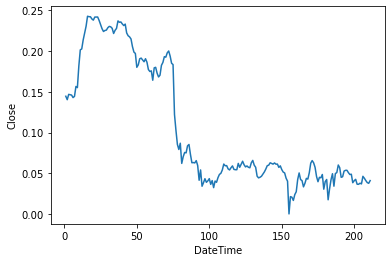

<Figure size 1152x648 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

plt.plot(df_min_max_scaled['Close'])

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [12]:
df_history2

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
3   2022-05-05 00:45:00  1.24840  1.24941  1.24808  1.24936  1.24849  1.24950   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
5   2022-05-05 01:15:00  1.24926  1.24954  1.24907  1.24920  1.24935  1.24963   
..                  ...      ...      ...      ...      ...      ...      ...   
207 2022-05-07 03:45:00  1.23456  1.23489  1.23395  1.23419  1.23471  1.23504   
208 2022-05-07 04:00:00  1.23420  1.23420  1.23360  1.23377  1.23435  1.23435   
209 2022-05-07 04:15:00  1.23376  1.23386  1.23339  1.23341  1.23391  1.23401   
210 2022-05-07 04:30:00  1.23340  1.23367  1.23319  1.23328  1.23355  1.23382   
211 2022-05-07 04:45:00  1.23320  1.23460  1.23304  1.23330  1.23335  1.23570   

                        last      mid                             
         Low    Close Volume     Open     High      Low    Close  
1    1.24796  1.24910   1981  1.24868  1.24909  1.24791  1.24906  
2    1.24833  1.24848   1666  1.24904  1.24925  1.24829  1.24844  
3    1.24817  1.24945   1542  1.24845  1.24946  1.24813  1.24940  
4    1.24916  1.24938   1596  1.24942  1.25005  1.24910  1.24933  
5    1.24916  1.24935   1445  1.24931  1.24959  1.24912  1.24927  
..       ...      ...    ...      ...      ...      ...      ...  
207  1.23410  1.23434   2260  1.23463  1.23496  1.23403  1.23427  
208  1.23375  1.23392    748  1.23428  1.23428  1.23367  1.23385  
209  1.23354  1.23356    603  1.23384  1.23394  1.23347  1.23349  
210  1.23334  1.23343    529  1.23347  1.23374  1.23327  1.23336  
211  1.23319  1.23440   1736  1.23327  1.23515  1.23312  1.23385  

[211 rows x 14 columns]

# Predict

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf

In [15]:
PREDICTOR_NAME = 'linear'

In [16]:
model = tf.keras.models.load_model(f'''../models/{PREDICTOR_NAME}''')

In [17]:
prediction = model.predict(df_min_max_scaled)
prediction

array([[ 1.41883031e-01],
       [ 1.44336998e-01],
       [ 1.40343487e-01],
       [ 1.46990091e-01],
       [ 1.46189690e-01],
       [ 1.45807281e-01],
       [ 1.42928690e-01],
       [ 1.44668773e-01],
       [ 1.56377330e-01],
       [ 1.55103222e-01],
       [ 1.81390241e-01],
       [ 2.01708719e-01],
       [ 2.02620029e-01],
       [ 2.13638812e-01],
       [ 2.22081661e-01],
       [ 2.30547622e-01],
       [ 2.42835209e-01],
       [ 2.42302418e-01],
       [ 2.42182642e-01],
       [ 2.38974854e-01],
       [ 2.37830609e-01],
       [ 2.41638422e-01],
       [ 2.41799608e-01],
       [ 2.41819084e-01],
       [ 2.37671033e-01],
       [ 2.32597783e-01],
       [ 2.27541834e-01],
       [ 2.24074617e-01],
       [ 2.25261047e-01],
       [ 2.25785777e-01],
       [ 2.28823826e-01],
       [ 2.30662897e-01],
       [ 2.29791522e-01],
       [ 2.28108063e-01],
       [ 2.21599460e-01],
       [ 2.25535288e-01],
       [ 2.27779135e-01],
       [ 2.37022355e-01],
       [ 2.3

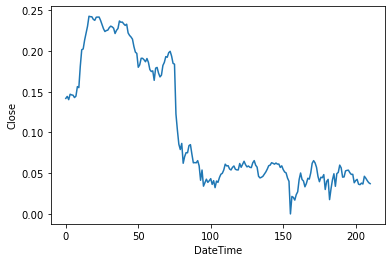

<Figure size 1152x648 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

plt.plot(prediction)

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [19]:
norm_prediction = round2(prediction[len(prediction)-1], 5)
norm_prediction

0.03713

### Get the UnNormalization Parameters

In [20]:
import json

f = open('../models/unnormalized_parameters.json')
data = json.load(f)
f.close()

In [21]:
data['Close']

{'min': 1.22784, 'max': 1.37467}

### UnNormalized the Prediction

In [22]:
# X = normX * (maxX - minX) + minX

predicted = norm_prediction * (data['Close']['max'] - data['Close']['min']) + data['Close']['min']
predicted = round2(predicted, 5)
predicted

1.23329

# Decision

In [23]:
df_history2.iloc[[len(df_history2)-1]]

DateTime     bid                               ask          \
                           Open    High      Low   Close     Open    High   
211 2022-05-07 04:45:00  1.2332  1.2346  1.23304  1.2333  1.23335  1.2357   

                       last      mid                             
         Low   Close Volume     Open     High      Low    Close  
211  1.23319  1.2344   1736  1.23327  1.23515  1.23312  1.23385

In [24]:
current_candle = df_min_max_scaled.iloc[[len(df_min_max_scaled)-1]]
current_candle

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
211,0.036984,0.028301,0.037566,0.040932,0.225576,0.29794,0.014045,0.105008,0.078075,0.15922,0.06423,1.0


In [25]:
current_close = round2(current_candle['Close'].values[0] * (data['Close']['max'] - data['Close']['min']) + data['Close']['min'], 5)
print(f'''current_close: {current_close}''')

current_close: 1.23385


In [26]:
predicted
print(f'''prediction: {predicted}''')

prediction: 1.23329


In [27]:
change = round2((predicted - current_close), 5)
change

-0.00056

In [28]:
CONFIDENCE_THRESHOLD = 0.0002
PROFIT_PIP = 0.00025
TO_DEAL = False

if abs(change) > CONFIDENCE_THRESHOLD:
    if change > 0:
        print("BUY")
        print(f'''Limit: {round2(current_close+PROFIT_PIP, 5)}''')
        TO_DEAL = True
    elif change < 0:
        print("SELL")
        print(f'''Limit: {round2(current_close-PROFIT_PIP, 5)}''')
        TO_DEAL = True
    else:
        print("NEUTRAL")

SELL
Limit: 1.2336


# IG Trade - Open Deal

In [ ]:
if TO_DEAL:
    pass